# Import required packages


In [7]:

import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns


In [12]:
# Load the cleaned data from the CSV file
tesla_data = pd.read_csv('../data/processed/TSLA_cleaned_data.csv')

# Display the first few rows to confirm it's loaded correctly
tesla_data.head()

,Price,Adj Close,Close,High,Low,Open,Volume,Symbol
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-02 00:00:00+00:00,14.620667457580566,-0.8793813586263205,-0.8791693688034182,-0.8803199985097936,-0.8767354963838372,-0.5519311404603224,TSLA
3,2015-01-05 00:00:00+00:00,14.005999565124512,-0.8849642649604302,-0.8831650869082771,-0.8841022292544043,-0.8817694128636164,-0.43026945613382556,TSLA
4,2015-01-06 00:00:00+00:00,14.085332870483398,-0.8842436963111971,-0.884526594367784,-0.885931345206174,-0.8844860365481717,-0.2503446940459389,TSLA


In [13]:
# Data summary and basic cleaning
tesla_data.dropna(inplace=True)  # Remove any NaN values if present
tesla_data['Close'] = tesla_data['Close'].astype(float)

# Train-test split (80% train, 20% test)
train_size = int(len(tesla_data) * 0.8)
train, test = tesla_data[:train_size], tesla_data[train_size:]
print("Training set:", train.shape)
print("Test set:", test.shape)

Training set: (1979, 8)
Test set: (495, 8)


In [14]:
tesla_data.head()

,Price,Adj Close,Close,High,Low,Open,Volume,Symbol
2,2015-01-02 00:00:00+00:00,14.620667457580566,-0.879381,-0.8791693688034182,-0.8803199985097936,-0.8767354963838372,-0.5519311404603224,TSLA
3,2015-01-05 00:00:00+00:00,14.005999565124512,-0.884964,-0.8831650869082771,-0.8841022292544043,-0.8817694128636164,-0.43026945613382556,TSLA
4,2015-01-06 00:00:00+00:00,14.085332870483398,-0.884244,-0.884526594367784,-0.885931345206174,-0.8844860365481717,-0.2503446940459389,TSLA
5,2015-01-07 00:00:00+00:00,14.063332557678223,-0.884444,-0.8841832494569534,-0.8824777291298647,-0.8824954580104033,-0.9136334828711624,TSLA
6,2015-01-08 00:00:00+00:00,14.041333198547363,-0.884643,-0.8847633775374344,-0.8823351215929014,-0.8828221809229997,-0.8181529257793031,TSLA


# Step 3 Data Exploration

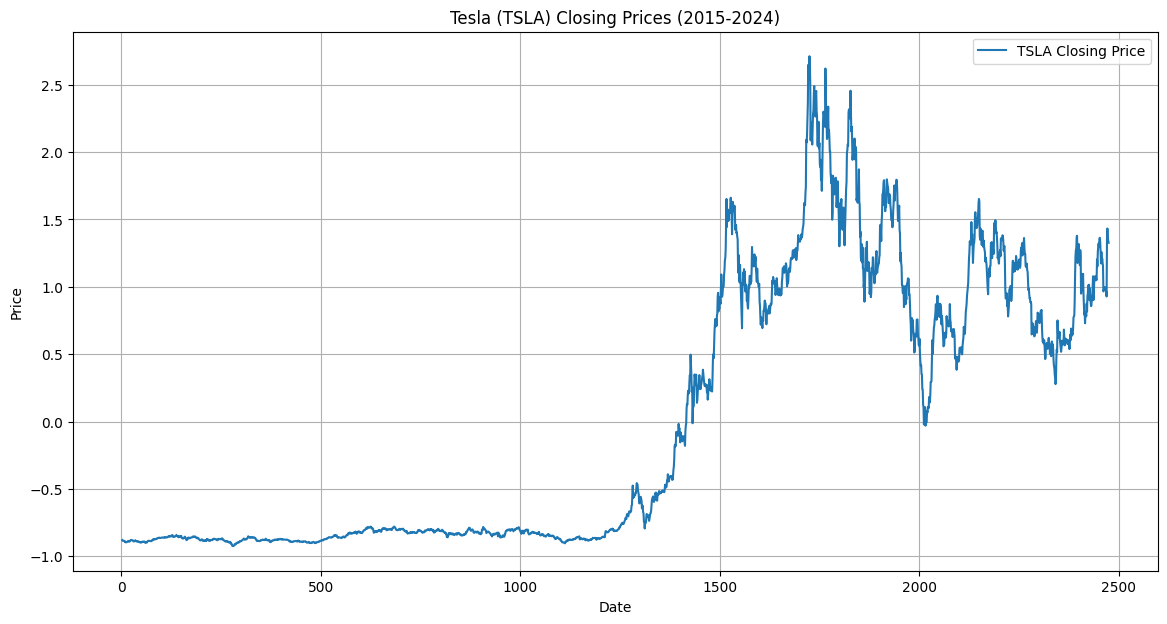

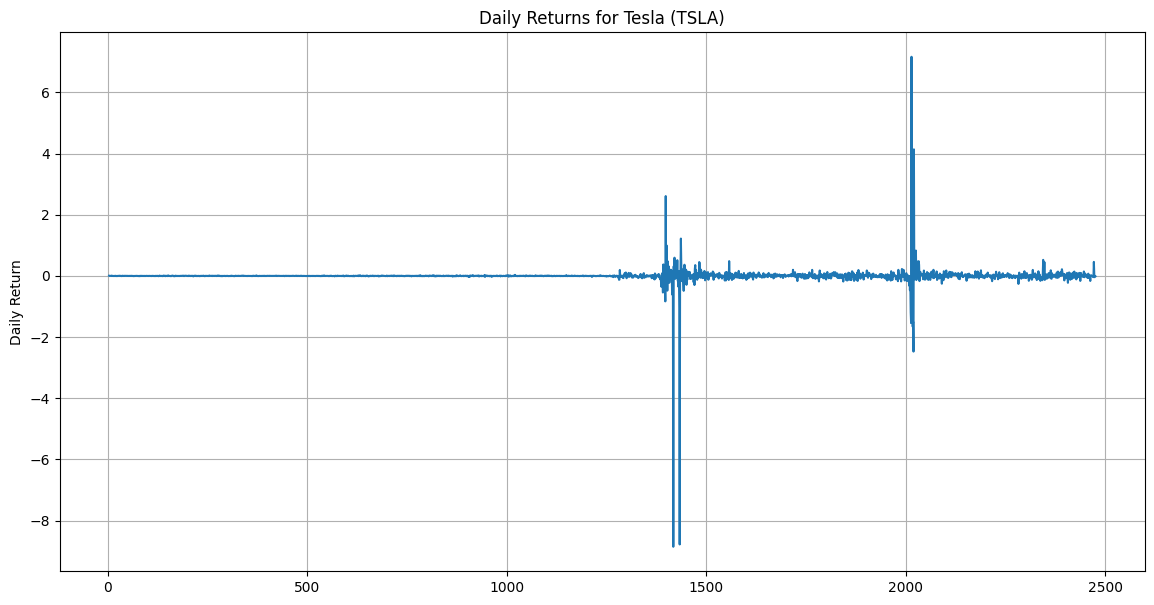

In [15]:
# Visualize Closing Prices
plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Close'], label='TSLA Closing Price')
plt.title('Tesla (TSLA) Closing Prices (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot daily returns to observe volatility
tesla_data['Daily Return'] = tesla_data['Close'].pct_change()
tesla_data['Daily Return'].plot(figsize=(14, 7), title='Daily Returns for Tesla (TSLA)')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()
